In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

df=pd.read_csv("./data/training_dataset.csv",low_memory=False)
df.match_date = df.match_date.apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))

In [2]:
df

,player1_name,player1_atprank,player2_name,player2_atprank,match_date,match_location,match_tournament,match_surface,match_odd_player1,match_odd_player2,winner_player1
0,Harrison R.,481,Mager G.,67,2021-01-07,Delray Beach,Delray Beach Open,Hard,1.72,2.00,0
1,Korda S.,26,Kwon S.W.,68,2021-01-07,Delray Beach,Delray Beach Open,Hard,1.72,2.00,1
2,Paul T.,14,Nam J.S.,590,2021-01-07,Delray Beach,Delray Beach Open,Hard,1.12,6.00,1
3,Travaglia S.,1024,Kecmanovic M.,40,2021-01-07,Antalya,Antalya Open,Hard,2.62,1.44,1
4,Monteiro T.,121,Bellucci T.,915,2021-01-07,Delray Beach,Delray Beach Open,Hard,1.36,3.00,1
...,...,...,...,...,...,...,...,...,...,...,...
7057,Tiafoe F.,10,Evans D.,30,2023-08-05,Washington,Citi Open,Hard,1.29,3.75,0
7058,Fritz T.,9,Griekspoor T.,37,2023-08-06,Washington,Citi Open,Hard,1.30,3.50,0
7059,Tsitsipas S.,5,De Minaur A.,19,2023-08-06,Los Cabos,Los Cabos Open,Hard,1.36,3.20,1
7060,Dimitrov G.,20,Evans D.,30,2023-08-06,Washington,Citi Open,Hard,1.36,3.20,0


In [3]:
df = df.dropna()

In [5]:
from sklearn.model_selection import train_test_split

X = df[["player1_atprank", "player2_atprank","match_date", "match_odd_player1", "match_odd_player2"]]
y = df.winner_player1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [6]:
X_test

,player1_atprank,player2_atprank,match_date,match_odd_player1,match_odd_player2
5663,121,108,2023-03-01,1.57,2.38
4865,231,240,2022-10-11,2.30,1.61
3282,125,48,2022-04-05,2.37,1.57
2600,128,37,2022-01-17,1.66,2.20
683,8,25,2021-04-02,2.00,1.80
...,...,...,...,...,...
5495,3,44,2023-02-16,1.13,6.00
5326,14,39,2023-01-19,1.50,2.63
1640,117,38,2021-07-20,4.00,1.25
1307,199,214,2021-06-15,1.90,1.90


In [7]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

X_train_filtered = X_train.drop("match_date",axis=1)
X_test_filtered = X_test.drop("match_date",axis=1)
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train_filtered, y_train)

#cross_val_score(dtree, X_test, y_test, cv=10)

y_predict = dtree.predict(X_test_filtered)

accuracy_score(y_predict, y_test)

0.5931721194879089

In [10]:
# ROI return of investment

print("We bet 1€ on all test matches")
df_roi = X_test.copy()
df_roi["y_predict"] = y_predict
df_roi["y_test"]=y_test

money_invested=df_roi.shape[0]
print("money spent:", money_invested,"€")

money_won = 0.0
for index, row in (df_roi[y_predict == y_test]).iterrows():
    if row.y_predict == 0 :
        money_won += row.match_odd_player2
    else:
        money_won += row.match_odd_player1

print("money won:",round(money_won,2),"€")
print("TOTAL:", round(money_won,2) - money_invested,"€")

We bet 1€ on all test matches
money spent: 1406 €
money won: 1353.26 €
TOTAL: -52.74000000000001 €


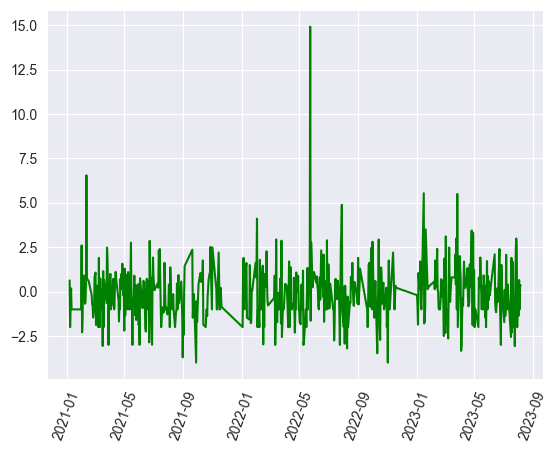

In [11]:
import matplotlib.pyplot as plt

df_roi = df_roi.sort_values(by='match_date')
dates = df_roi.match_date.unique()
data = []

for date in dates :
    money_won = 0.0
    #test = df_roi.at[df_roi.index[0],"match_date"]
    df_roi_filtered = df_roi.loc[df_roi["match_date"]==date]
    #print(df_roi_filtered)
    money_won-=df_roi_filtered.shape[0]

    for index, row in (df_roi_filtered.loc[df_roi_filtered["y_predict"] == df_roi_filtered["y_test"]]).iterrows():
        if row.y_predict == 0 :
            money_won += row.match_odd_player2
        else:
            money_won += row.match_odd_player1

    data.append(money_won)

dates = dates.astype('datetime64[ns]')

plt.plot_date(pd.to_datetime(dates.date, format='%Y-%m-%d'), data, 'g')
plt.xticks(rotation=70)
plt.show()


d = {'date': dates.date, 
     'money_won': data}
roi = pd.DataFrame(data=d)

In [12]:
roi.sort_values(by="money_won")

,date,money_won
398,2022-11-02,-4.00
173,2021-09-28,-4.00
164,2021-08-31,-3.70
381,2022-10-11,-3.47
465,2023-04-04,-3.34
...,...,...
338,2022-07-29,4.89
461,2023-03-27,5.50
416,2023-01-16,5.54
15,2021-02-11,6.55


In [14]:
df_roi

,player1_atprank,player2_atprank,match_date,match_odd_player1,match_odd_player2,y_predict,y_test
3,1024,40,2021-01-07,2.62,1.44,0,1
9,157,123,2021-01-07,2.75,1.40,0,0
5,146,25,2021-01-07,2.20,1.61,0,0
2,14,590,2021-01-07,1.12,6.00,1,1
6,267,118,2021-01-07,2.50,1.50,0,0
...,...,...,...,...,...,...,...
7029,19,136,2023-08-03,1.08,8.00,1,1
7028,84,123,2023-08-03,1.57,2.38,1,1
7048,34,72,2023-08-04,1.91,1.91,1,0
7055,84,19,2023-08-05,4.00,1.25,0,0
